# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [91]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from feature_engine.encoding import CountFrequencyEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [72]:
df = pd.read_csv('..\personality_dataset_raw.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\halid\AppData\Local\Temp\ipykernel_5468\3290222372.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('..\personality_dataset_raw.csv')


In [73]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


**Penjelasan:**

Pada dataset ini, terdapat 8 fitur, dengan 5 diantaranya numeric, dan 3 diantaranya categoric.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [75]:
numeric_features = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()#Type your code here

In [76]:
for col in categorical_features:
    print(f'{col} : {df[col].nunique()}')

Stage_fear : 2
Drained_after_socializing : 2
Personality : 2


In [77]:
for col in categorical_features:
    print(f'{col} : {df[col].unique()}')

Stage_fear : ['Yes' 'No']
Drained_after_socializing : ['No' 'Yes']
Personality : ['Extrovert' 'Introvert']


**Penjelasan :**

- terdapat 3 fitur yang bertiipe `object`, yaitu `Stage_fear`, `Drained_after_socializing`, dan `Personality`
- masing-masing fitur memiliki 2 unique value.

In [78]:
df.describe(include="all")

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,5000.000000,5000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,Yes,NaN,NaN,Introvert
freq,NaN,2759,NaN,NaN,2753,NaN,NaN,2502
mean,4.969000,NaN,4.995200,3.523400,NaN,7.253200,4.759800,NaN
std,3.033922,NaN,2.862449,2.088618,NaN,4.045783,2.780369,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,3.000000,NaN,3.000000,2.000000,NaN,5.000000,3.000000,NaN
50%,5.000000,NaN,5.000000,4.000000,NaN,7.000000,5.000000,NaN
75%,7.000000,NaN,7.000000,5.000000,NaN,10.000000,7.000000,NaN


<Figure size 1500x1000 with 0 Axes>

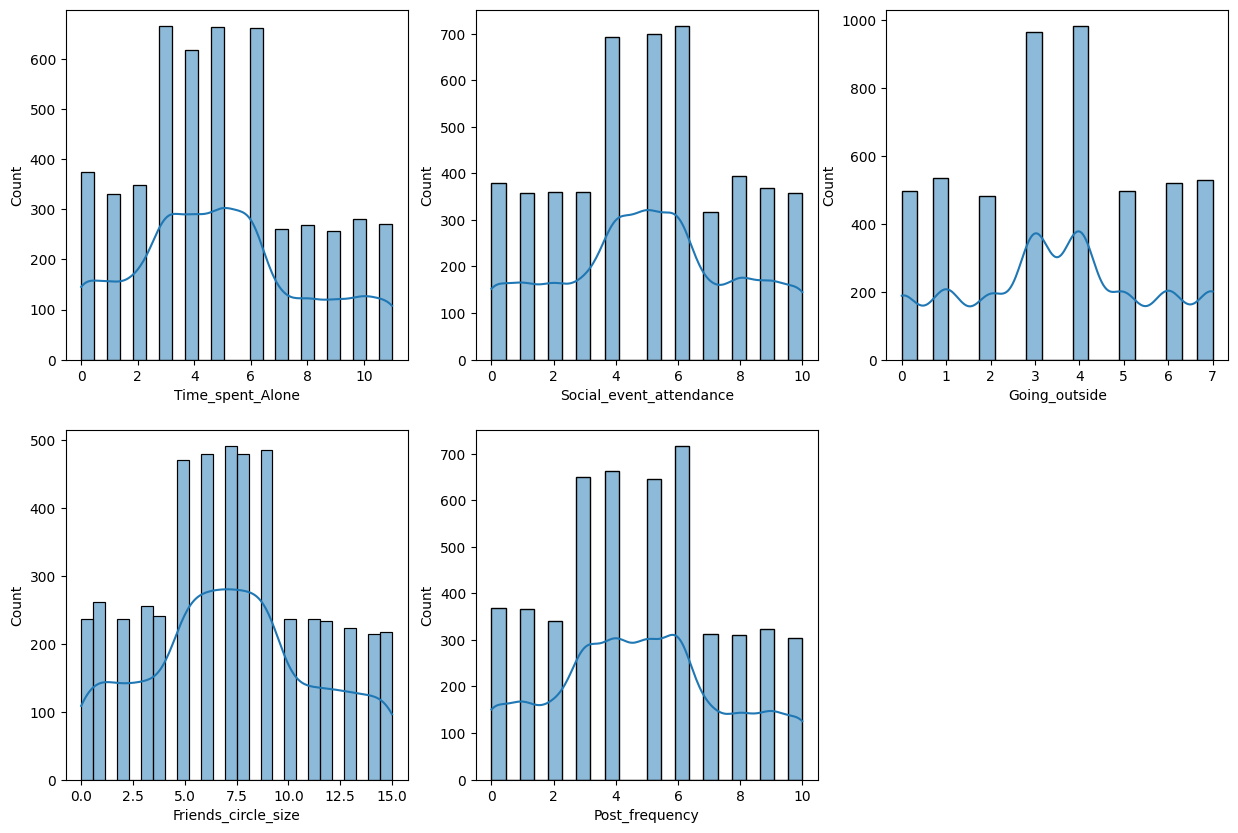

In [79]:
n = len(numeric_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(x=col, data=df, ax=axes[i], kde=True)

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

**Distribusi Variabel Numerik**

1. `Time_spent_Alone`
- Puncak distribusi berada pada rentang 4–6 jam.
- Menunjukkan bahwa sebagian besar individu menghabiskan waktu sendirian dalam durasi sedang, bukan terlalu sedikit atau terlalu banyak.

2. `Social_event_attendance`
- Distribusi cenderung simetris dengan puncak di tengah (sekitar 4–6 kali kehadiran).
- Menunjukkan bahwa mayoritas orang menghadiri acara sosial dalam frekuensi sedang.

3. `Going_outside`
- Pola distribusi menonjol di tengah (3–4 kali keluar rumah).
- Artinya, sebagian besar individu keluar rumah secara moderat setiap minggunya.

4. `Friends_circle_size`
- Distribusi menunjukkan bahwa sebagian besar orang memiliki 5–10 teman dekat.
- Jumlah yang sangat sedikit atau sangat banyak lebih jarang terjadi.

5. `Post_frequency`
- Sebagian besar individu memposting di media sosial sekitar 4–6 kali dalam periode tertentu.
- Pola ini menyerupai distribusi pada kehadiran sosial dan frekuensi keluar rumah.

---

**Kesimpulan**

Sebagian besar responden cenderung berada di tengah. Hal ini menunjukkan kecenderungan populasi terhadap keseimbangan dalam kehidupan sosial dan waktu pribadi.


<Figure size 1500x1000 with 0 Axes>

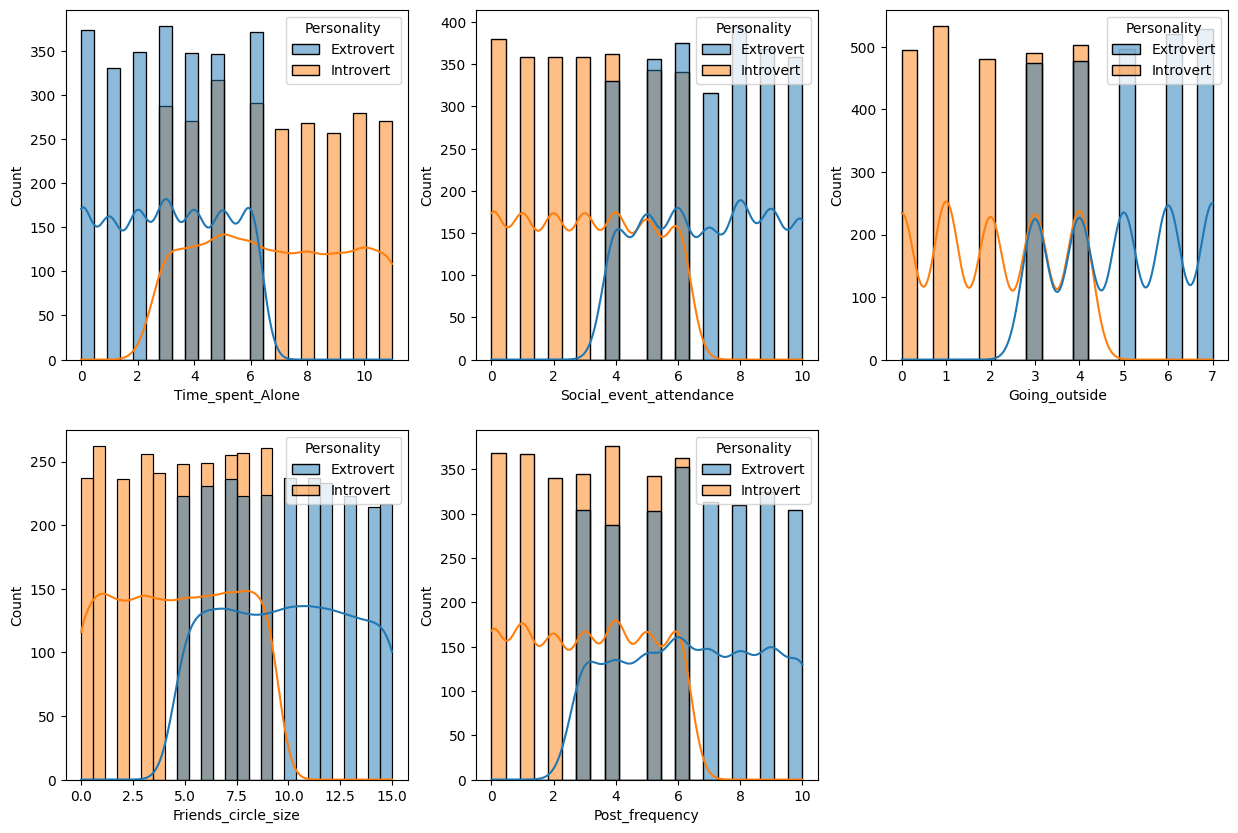

In [80]:
n = len(numeric_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(x=col, data=df, ax=axes[i], kde=True, hue='Personality')

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

**Distribusi Variabel Numerik terhadap `Personality` (Introvert vs Extrovert)**

Visualisasi berikut menampilkan perbandingan distribusi lima variabel numerik utama berdasarkan kategori kepribadian (`Introvert` dan `Extrovert`). Setiap grafik menggambarkan jumlah individu dalam masing-masing kategori kepribadian terhadap nilai variabel tersebut, lengkap dengan kurva KDE untuk mengilustrasikan tren distribusi.

1. `Time_spent_Alone`

- **Extrovert** menunjukkan sebaran lebih tinggi pada durasi lebih pendek (0–5 jam).
- **Introvert** cenderung menghabiskan lebih banyak waktu sendirian, dengan puncak distribusi pada 7–10 jam.

2. `Social_event_attendance`

- **Extrovert** mendominasi frekuensi kehadiran di acara sosial pada rentang 5–10 kali.
- **Introvert** lebih sering berada pada frekuensi rendah (0–3 kali).

3. `Going_outside`

- **Extrovert** lebih banyak yang sering keluar rumah (4–7 kali).
- **Introvert** menunjukkan frekuensi rendah dalam aktivitas keluar rumah (0–2 kali).

4. `Friends_circle_size`

- **Extrovert** memiliki lingkaran pertemanan lebih besar, dengan banyak berada pada ukuran >10 teman.
- **Introvert** lebih banyak memiliki 0–5 teman dekat.

5. `Post_frequency`

- **Extrovert** lebih sering memposting di media sosial (5–10 kali).
- **Introvert** cenderung memiliki frekuensi posting rendah (0–4 kali).

---

**Kesimpulan**

Distribusi variabel numerik memperlihatkan pola yang konsisten antara kepribadian dan perilaku sosial:

- **Extrovert** lebih aktif secara sosial, baik dalam interaksi langsung maupun daring.
- **Introvert** menunjukkan preferensi terhadap aktivitas individual dan keterlibatan sosial yang lebih rendah.

<Figure size 1500x1000 with 0 Axes>

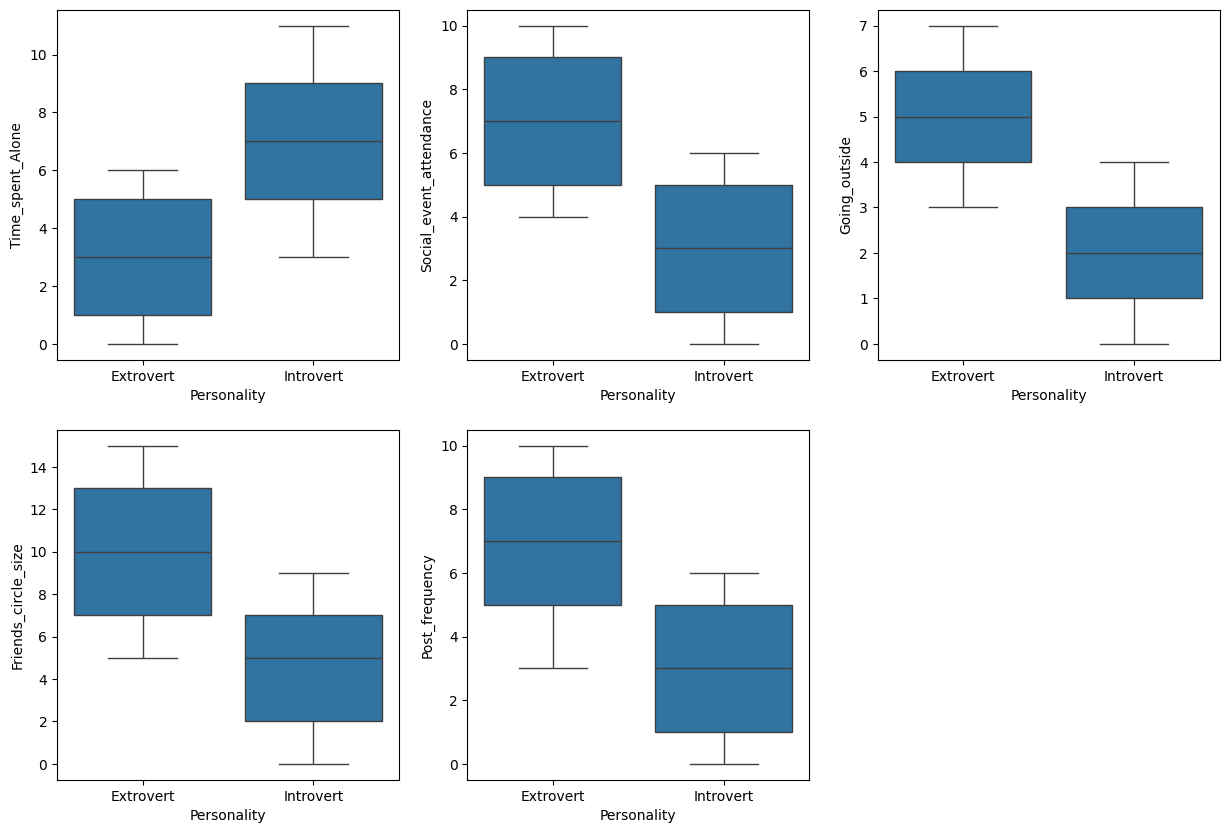

In [81]:
n = len(numeric_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(x='Personality', y=col, data=df, ax=axes[i])

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

**Boxplot Variabel Numerik terhadap `Personality` (Introvert vs Extrovert)**

Visualisasi ini memperlihatkan boxplot lima variabel numerik utama yang dibandingkan antara dua kelompok kepribadian: `Introvert` dan `Extrovert`. Boxplot memberikan informasi mengenai sebaran, median, dan outlier untuk masing-masing variabel.

1. `Time_spent_Alone`
- **Introvert** memiliki median waktu menyendiri yang lebih tinggi dibanding extrovert.
- Distribusi introvert cenderung lebih tinggi secara keseluruhan (3 hingga 11 jam).
- **Extrovert** cenderung menghabiskan waktu sendiri lebih sedikit (0 hingga 6 jam).

2. `Social_event_attendance`
- **Extrovert** lebih sering menghadiri acara sosial, dengan median di atas 6 kali.
- **Introvert** memiliki rentang yang lebih rendah, dengan banyak individu yang hanya hadir 0–3 kali.

3. `Going_outside`
- **Extrovert** lebih sering keluar rumah, dengan distribusi sempit namun tinggi (sekitar 4–6 kali).
- **Introvert** memiliki rentang yang lebih rendah, dengan median sekitar 2 kali.

4. `Friends_circle_size`
- **Extrovert** memiliki lingkaran pertemanan yang jauh lebih besar, median sekitar 10 teman.
- **Introvert** memiliki median sekitar 5, dengan sebaran banyak pada nilai kecil (termasuk 0 teman dekat).

5. `Post_frequency`
- **Extrovert** lebih sering memposting di media sosial (median 7), mencerminkan kecenderungan ekspresif.
- **Introvert** menunjukkan frekuensi yang lebih rendah (median sekitar 3).

---

**Kesimpulan**

Boxplot memperkuat observasi sebelumnya bahwa:

- **Extrovert** cenderung lebih aktif secara sosial dan publik, memiliki jaringan pertemanan lebih besar, serta sering keluar rumah dan berbagi di media sosial.
- **Introvert** lebih suka menyendiri, jarang menghadiri acara sosial, memiliki lebih sedikit teman dekat, dan cenderung kurang aktif dalam hal berbagi di media sosial.

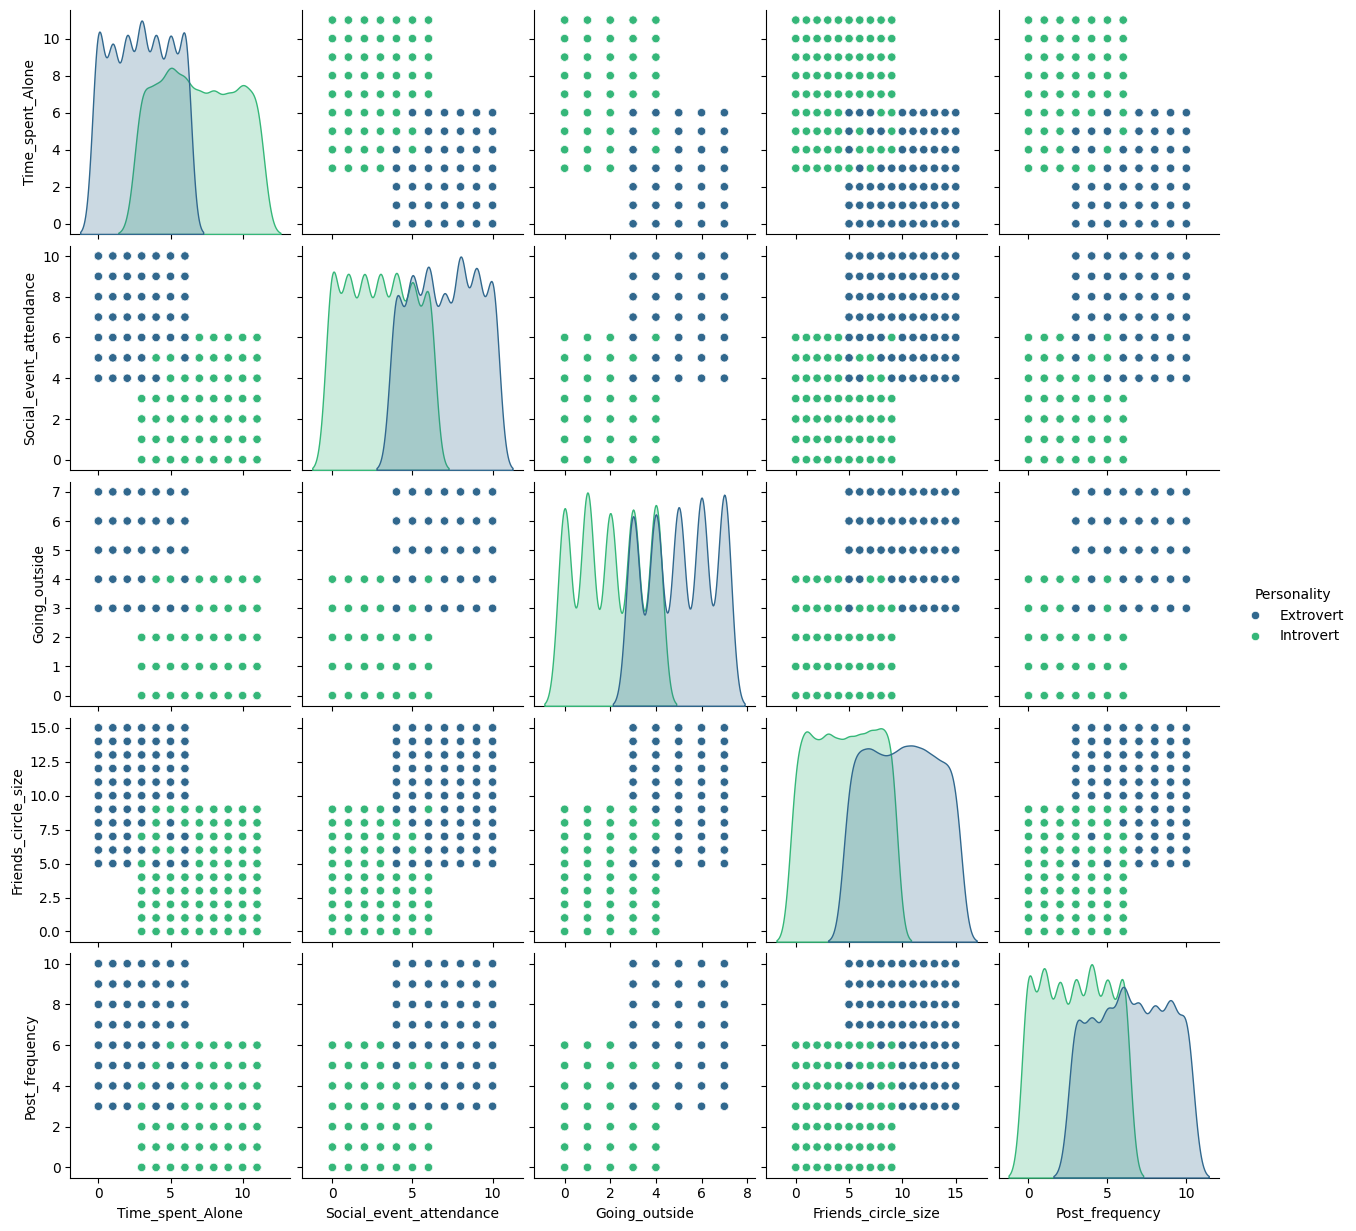

In [82]:
sns.pairplot(df, hue="Personality", vars=numeric_features, palette="viridis")
plt.show()

**Pairplot Variabel Numerik terhadap Personality (Introvert vs Extrovert)**

Visualisasi berikut adalah **pairplot** yang menampilkan hubungan antara setiap pasangan variabel numerik, dikelompokkan berdasarkan tipe kepribadian: `Introvert` (hijau) dan `Extrovert` (biru). Diagonal menunjukkan distribusi masing-masing variabel, sementara bagian bawah-diagonal menunjukkan hubungan antar fitur.

Insight dari Visualisasi:

1. **Distribusi Univariabel (Diagonal Plot)**
- **Introvert** menunjukkan distribusi yang lebih tinggi pada `Time_spent_Alone`, dan lebih rendah pada fitur lain seperti `Social_event_attendance`, `Going_outside`, `Friends_circle_size`, dan `Post_frequency`.
- Sebaliknya, **Extrovert** menunjukkan tren yang berlawanan: lebih aktif secara sosial dan publik.

2. **Korelasi Antar Fitur**
Beberapa pola hubungan yang dapat diamati:
- `Friends_circle_size` vs `Post_frequency`: Ekstrovert cenderung memiliki lebih banyak teman sekaligus lebih sering memposting.
- `Going_outside` vs `Social_event_attendance`: Terdapat hubungan yang kuat—semakin sering seseorang keluar rumah, semakin besar kemungkinan ia menghadiri acara sosial.
- `Time_spent_Alone` tampak tidak terlalu berkorelasi dengan fitur lainnya bagi Extrovert, tetapi menunjukkan tren negatif dengan `Social_event_attendance` dan `Friends_circle_size` pada Introvert.

3. **Pemisahan yang Jelas antara Kepribadian**
- Terlihat cukup banyak pemisahan antara titik-titik hijau (Introvert) dan biru (Extrovert) dalam sebagian besar kombinasi fitur.
- Ini mengindikasikan bahwa fitur-fitur numerik ini cukup representatif untuk membedakan kepribadian, dan dapat digunakan untuk prediksi atau klasifikasi.

---

**Kesimpulan**

Pairplot ini menunjukkan bahwa tipe kepribadian (`Introvert` vs `Extrovert`) memiliki pola distribusi dan hubungan antar fitur yang cukup berbeda. Visualisasi ini berguna sebagai eksplorasi awal untuk melihat apakah fitur-fitur numerik memiliki potensi dalam membedakan kepribadian individu secara statistik maupun model prediktif.



<Figure size 1500x1000 with 0 Axes>

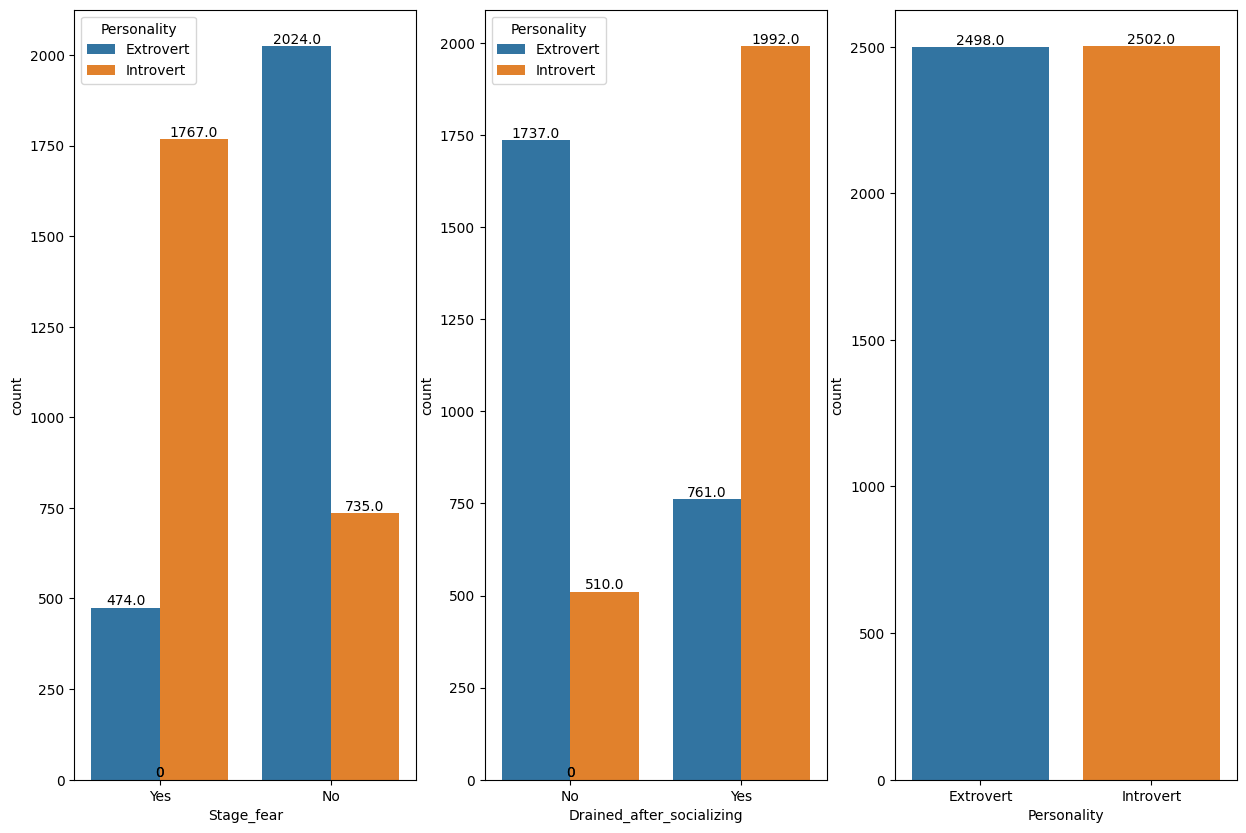

In [83]:
n = len(categorical_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df['Personality'])

# Add labels to each bar
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points')

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

**Distribusi Fitur Kategorikal terhadap Personality (Introvert vs Extrovert)**

Visualisasi ini menunjukkan perbandingan jumlah individu Extrovert dan Introvert dalam kaitannya dengan dua variabel kategorikal: `Stage_fear` dan `Drained_after_socializing`. Grafik terakhir menunjukkan distribusi total masing-masing kategori kepribadian untuk konteks proporsi data.

1. `Stage_fear` (Takut tampil di depan umum)
- Sebagian besar **Introvert** menjawab "Yes" (memiliki ketakutan tampil di depan umum), sebanyak **1.767 orang**.
- Sebaliknya, mayoritas **Extrovert** menjawab "No" (tidak takut tampil), sebanyak **2.024 orang**.
- Ini sejalan dengan stereotip bahwa introvert cenderung merasa kurang nyaman dalam situasi publik.

2. `Drained_after_socializing` (Merasa lelah setelah sosialisasi)
- Mayoritas **Introvert** merasa lelah setelah bersosialisasi (**1.992 orang**).
- Sebaliknya, sebagian besar **Extrovert** merasa tidak lelah setelah bersosialisasi (**1.737 orang**).
- Ini menunjukkan bahwa energi sosial menjadi pembeda utama antara dua kepribadian ini.

3. `Personality` (Distribusi Data)
- Jumlah data cukup seimbang antara **Extrovert** (2.498) dan **Introvert** (2.502), sehingga distribusi kategori tidak bias.

---

**Kesimpulan**

Fitur kategorikal seperti `Stage_fear` dan `Drained_after_socializing` menunjukkan asosiasi yang kuat dengan tipe kepribadian:

- **Introvert** lebih mungkin memiliki ketakutan tampil di depan umum dan merasa terkuras setelah interaksi sosial.
- **Extrovert** cenderung tidak mengalami hal tersebut, menunjukkan kenyamanan dalam lingkungan sosial dan publik.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Mengecek missing value dan data duplikat

In [84]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [85]:
df.duplicated().sum()

np.int64(128)

**Penjelasan:**

- **tidak terdapat missing value** pada dataset.
- terdapat **data duplikat** sebanyak **128 baris**.

In [86]:
df = df.drop_duplicates()

In [87]:
df.duplicated().sum()

np.int64(0)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4872 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           4872 non-null   int64 
 1   Stage_fear                 4872 non-null   object
 2   Social_event_attendance    4872 non-null   int64 
 3   Going_outside              4872 non-null   int64 
 4   Drained_after_socializing  4872 non-null   object
 5   Friends_circle_size        4872 non-null   int64 
 6   Post_frequency             4872 non-null   int64 
 7   Personality                4872 non-null   object
dtypes: int64(5), object(3)
memory usage: 342.6+ KB


**Penjelasan:**

- data duplikat berhasil dihapus.
- total baris berubah dari **5000 baris** menjadi **4872 baris**

In [89]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert
...,...,...,...,...,...,...,...,...
4993,6,No,10,3,No,5,10,Extrovert
4996,7,No,2,3,Yes,2,5,Introvert
4997,2,No,7,3,No,11,3,Extrovert
4998,2,Yes,9,3,No,15,7,Extrovert


## Standarisasi untuk fitur numeric

In [92]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

**Penjelasan:**

Normalisasi dengan MinMaxScaler mengubah nilai numerik ke **rentang 0 hingga 1**, tanpa mengubah bentuk distribusi datanya.

## Encoding untuk fitur categoric

In [93]:
# Encoding untuk kolom dengan nilai Yes/No menjadi 0/1
binary_cols = ['Stage_fear', 'Drained_after_socializing']
for col in binary_cols:
    print(f"Data sebelum encoding ({col}):")
    print(df[col].value_counts(normalize=True), end="\n\n")
    
    df[col] = df[col].map({'No': 0, 'Yes': 1})

    print(f"Data setelah encoding ({col}):")
    print(df[col].value_counts(normalize=True), end="\n\n")

Data sebelum encoding (Stage_fear):
Stage_fear
No     0.55275
Yes    0.44725
Name: proportion, dtype: float64

Data setelah encoding (Stage_fear):
Stage_fear
0    0.55275
1    0.44725
Name: proportion, dtype: float64

Data sebelum encoding (Drained_after_socializing):
Drained_after_socializing
Yes    0.551519
No     0.448481
Name: proportion, dtype: float64

Data setelah encoding (Drained_after_socializing):
Drained_after_socializing
1    0.551519
0    0.448481
Name: proportion, dtype: float64



In [94]:
le = LabelEncoder()

# Encoding semua kolom bertipe object selain Yes/No
for col in df.select_dtypes(include='object').columns:
    if col not in binary_cols:
        print(f"Data sebelum encoding ({col}):")
        print(df[col].value_counts(normalize=True), end="\n\n")
        
        df[col] = le.fit_transform(df[col])

        print(f"Data setelah encoding ({col}):")
        print(df[col].value_counts(normalize=True), end="\n\n")

Data sebelum encoding (Personality):
Personality
Introvert    0.500821
Extrovert    0.499179
Name: proportion, dtype: float64

Data setelah encoding (Personality):
Personality
1    0.500821
0    0.499179
Name: proportion, dtype: float64



**Encoding Fitur Kategorikal**

Encoding dilakukan untuk mengubah data kategorikal (string) menjadi bentuk numerik agar dapat digunakan dalam model machine learning.

1. Encoding Binary (Yes/No ➝ 0/1)
Untuk kolom dengan dua kategori `Yes` dan `No`, digunakan `.map()` agar hasil encoding konsisten:
- `No` ➝ `0`
- `Yes` ➝ `1`

untuk kolom:
- `Stage_fear`
- `Drained_after_socializing`

2. Encoding Kategorikal Umum (LabelEncoder)
Untuk kolom kategorikal lainnya (dengan lebih dari dua label), digunakan `LabelEncoder` dari Scikit-learn.
- Setiap nilai unik dikonversi ke angka (misal `Introvert` ➝ `1`, `Extrovert` ➝ `0`).
- Dilakukan hanya pada kolom bertipe `object`, **kecuali** yang sudah di-handle secara khusus seperti binary (`Yes/No`).

Tujuan:
Mengubah data menjadi numerik dengan tetap mempertahankan makna kategorinya, agar bisa digunakan oleh model machine learning.



## Hasil setelah data preprocessing

In [95]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.272727,1,0.6,1.000000,0,0.933333,0.5,0
1,0.181818,0,0.8,0.857143,0,0.466667,0.8,0
2,0.090909,0,0.9,0.571429,0,0.600000,0.3,0
3,0.727273,0,0.0,0.000000,1,0.600000,0.3,1
4,0.454545,1,0.3,0.000000,0,0.133333,0.6,1
...,...,...,...,...,...,...,...,...
4993,0.545455,0,1.0,0.428571,0,0.333333,1.0,0
4996,0.636364,0,0.2,0.428571,1,0.133333,0.5,1
4997,0.181818,0,0.7,0.428571,0,0.733333,0.3,0
4998,0.181818,1,0.9,0.428571,0,1.000000,0.7,0


In [96]:
df.describe(include="all")

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,0.452381,0.447250,0.499384,0.502551,0.551519,0.483621,0.475862,0.500821
std,0.276196,0.497261,0.285573,0.298511,0.497390,0.270576,0.278380,0.500051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.000000,0.300000,0.285714,0.000000,0.333333,0.300000,0.000000
50%,0.454545,0.000000,0.500000,0.571429,1.000000,0.466667,0.500000,1.000000
75%,0.636364,1.000000,0.700000,0.714286,1.000000,0.666667,0.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1500x1000 with 0 Axes>

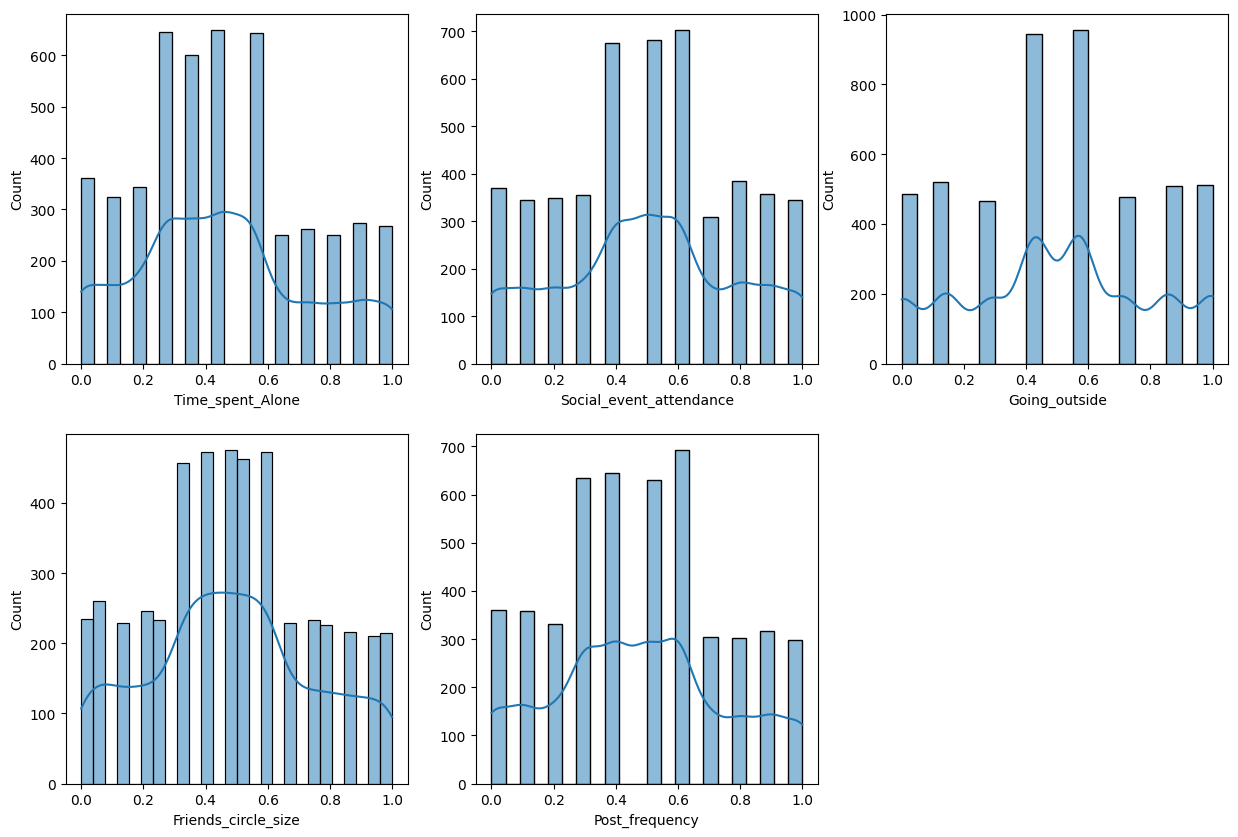

In [97]:
n = len(numeric_features)
width = 3
height = -(-n // width)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(height, width, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(x=col, data=df, ax=axes[i], kde=True)

# Turn off the unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Save Dataset

In [98]:
df.to_csv('manual_personality_data_cleaned.csv', index=False)